Allah

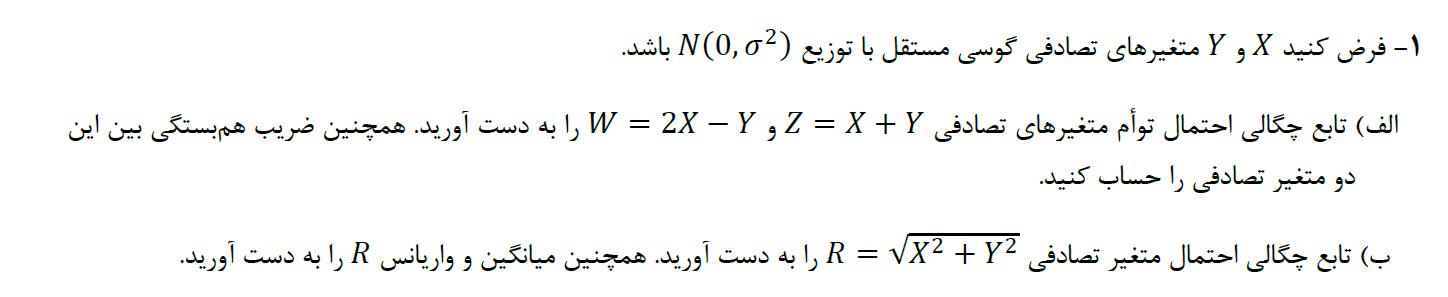

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(plt.colormaps())  # List all available colormaps

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

Text(0.5, 1.0, 'joint histogram (pdf) of z and w ')

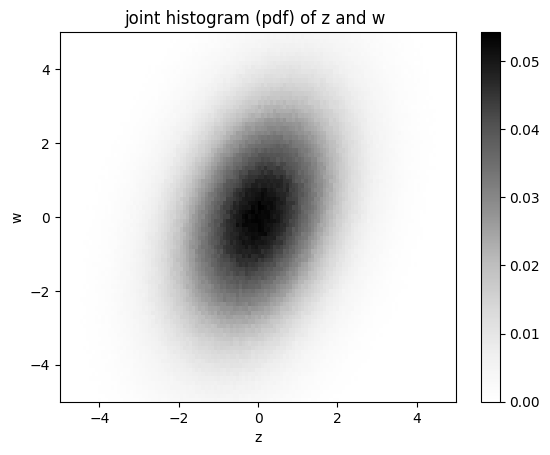

In [ ]:
sigma = 1
N= 10_000_000
x = sigma * np.random.randn(N)
y = sigma * np.random.randn(N)
z = x +y
w = 2*x - y

image = plt.hist2d(z,w, bins = 200, density = True, cmap = 'Greys')
plt.xlabel('z')
plt.ylabel('w')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.colorbar()
plt.title('joint histogram (pdf) of z and w ')

Text(0.5, 1.0, 'Raighley pdf')

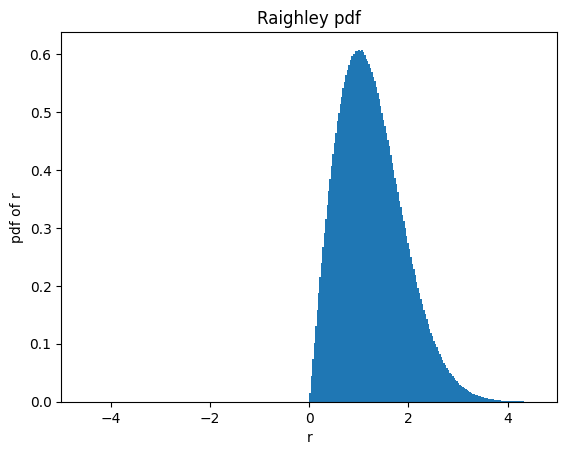

In [ ]:
r = (x**2 + y**2)**0.5
image = plt.hist(r, bins = 200, density = True)
plt.xlabel('r')
plt.ylabel('pdf of r')
plt.xlim([-5,5])

plt.title('Raighley pdf')

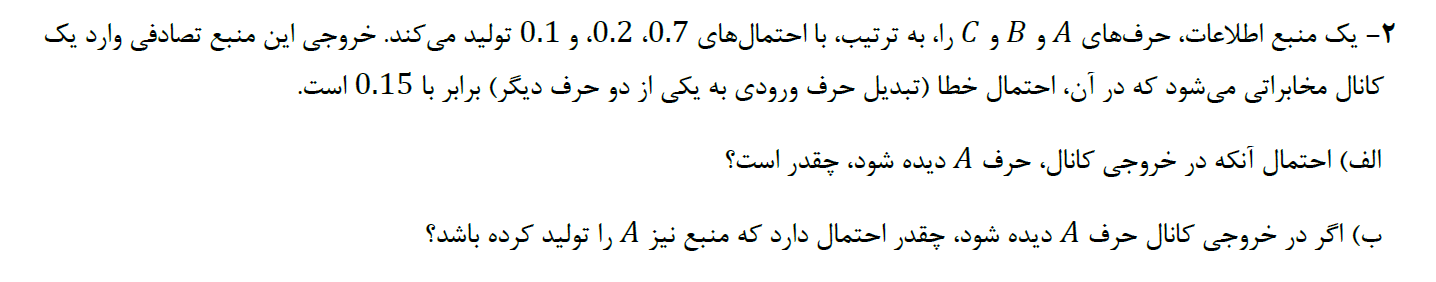

In [ ]:
import numpy as np
N = 100_000_000
alphabets = ['A', 'B', 'C']
probabilities = [0.7, 0.2, 0.1]
X = np.random.choice(alphabets, size = N, replace=True, p=probabilities)
# Parameters
true_transmit_prob = 0.7  # Probability of success (1)
size = 10  # Number of samples

# Generate Bernoulli random variables
true_transmit_flag = np.random.binomial(n=1, p=true_transmit_prob, size=N)



toggle_A_locs = np.where((X == 'A') & (true_transmit_flag == 0))[0]
toggle_B_locs = np.where((X == 'B') & (true_transmit_flag == 0))[0]
toggle_C_locs = np.where((X == 'C') & (true_transmit_flag == 0))[0]
true_locs = np.where(true_transmit_flag == 1)[0]

Y = np.copy(X)
Y[toggle_A_locs] = np.random.choice(['B','C'], size = len(toggle_A_locs), replace=True)
Y[toggle_B_locs] = np.random.choice(['A','C'], size = len(toggle_B_locs), replace=True)
Y[toggle_C_locs] = np.random.choice(['B','A'], size = len(toggle_C_locs), replace=True)
# P[Y = A]
print('P[Y = A] = ', np.sum(Y == 'A') / len(Y))
# P[X = A | Y = A]
Y_A_locs = np.where(Y == 'A')[0]
print('P[X = A | Y = A]', np.sum(X[Y_A_locs] == 'A') / len(Y_A_locs))

P[Y = A] =  0.53495683
P[X = A | Y = A] 0.9159132149037148


In [ ]:
toggle_A_locs.shape, len(toggle_A_locs)

((209993,), 209993)

In [ ]:
true_transmit_flag[:10]

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
0.7 * 0.7 + 0.15 * 0.2 + 0.15 * 0.1

0.5349999999999999

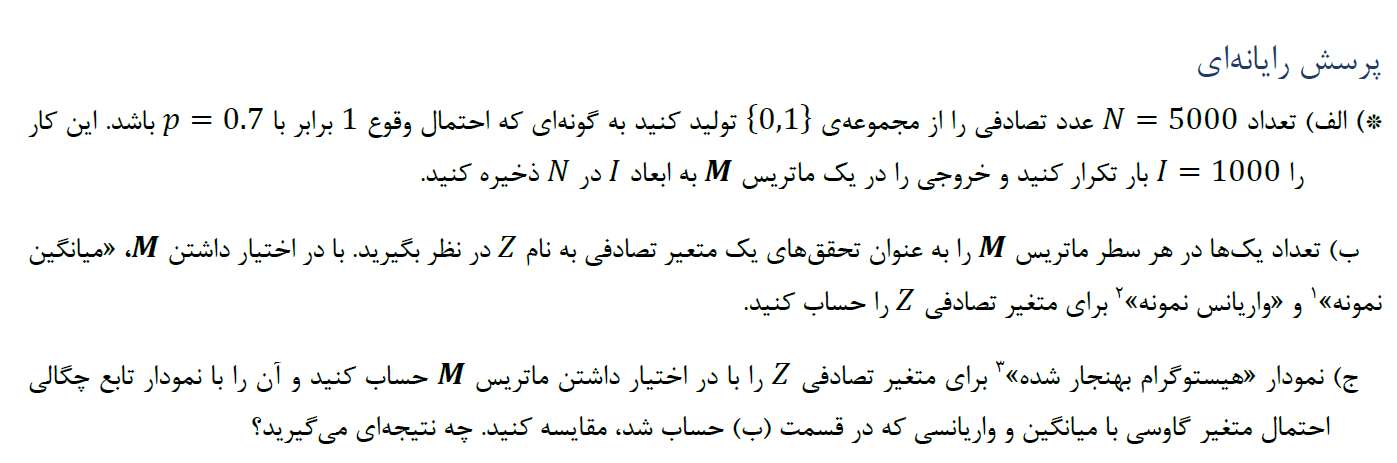

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z_mean 3499.351
z_var 965.9817989999999


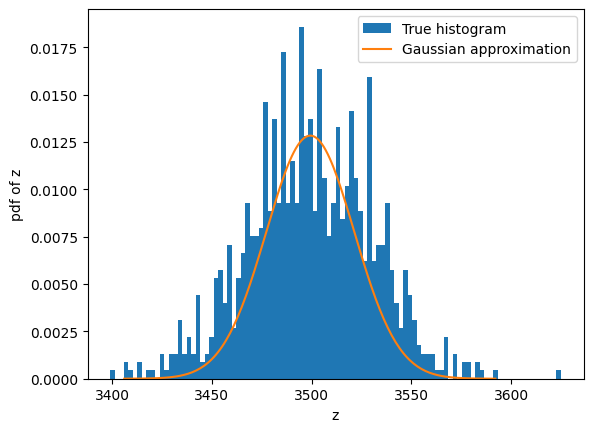

In [22]:
N = 5_000
I = 1_000
success_prob  = 0.7
# Generate Bernoulli random variables
M = np.random.binomial(n=1, p=success_prob, size=(I,N))
M.shape

Z_realizations = M.sum(axis=1)
Z_realizations.shape
Z_realizations[:10]
z_mean = Z_realizations.mean()
print('z_mean', z_mean)
z_var = Z_realizations.var()
print('z_var', z_var)

def gauss_pdf(x, mu, sigma):
  return 1/np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2/(sigma**2))

image = plt.hist(Z_realizations, bins = 100, density = True,
                 label = 'True histogram')
plt.xlabel('z')
plt.ylabel('pdf of z')
k = 3
step = 1
z_range = np.arange(z_mean - k * z_var**0.5, z_mean + k * z_var**0.5, step)
plt.plot(z_range, gauss_pdf(z_range, z_mean, z_var**0.5),
         label = 'Gaussian approximation')
plt.legend()

z_mean 6999.8884
z_var 2100.11594544


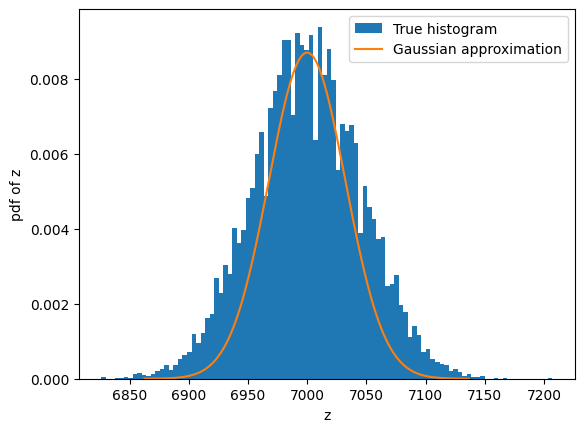

In [28]:
N = 10_000
I = 10_000
success_prob  = 0.7
# Generate Bernoulli random variables
M = np.random.binomial(n=1, p=success_prob, size=(I,N))
M.shape

Z_realizations = M.sum(axis=1)
Z_realizations.shape
Z_realizations[:10]
z_mean = Z_realizations.mean()
print('z_mean', z_mean)
z_var = Z_realizations.var()
print('z_var', z_var)

def gauss_pdf(x, mu, sigma):
  return 1/np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2/(sigma**2))

image = plt.hist(Z_realizations, bins = 100, density = True,
                 label = 'True histogram')
plt.xlabel('z')
plt.ylabel('pdf of z')
k = 3
step = 1
z_range = np.arange(z_mean - k * z_var**0.5, z_mean + k * z_var**0.5, step)
plt.plot(z_range, gauss_pdf(z_range, z_mean, z_var**0.5),
         label = 'Gaussian approximation')
plt.legend()